# Projet de statistiques - MDI220 - Nelson Roux de Bézieux 

**Exercice 1**

In [2]:
import pandas as pd 
from os import path
import scipy as sp
import numpy as np 
import matplotlib.pyplot as plt


# check datasets
if not all([path.isfile(ProjetMDI220) for ProjetMDI220 in ['C_id_35_NuclearPowerAccidents2016.csv']]):
    print('Please download the datasets and save them in the working directory.')
else:
    print("You're ready!")
    
    

You're ready!


**1]**

In [3]:
df = pd.read_csv('C_id_35_NuclearPowerAccidents2016.csv', usecols=['Date','Location','Cost (millions 2013US$)','INES','Smyth Magnitude', 'Region', 'Description','Fatalities'], low_memory=False)

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by="Date")

In [5]:
df


,Date,Location,Cost (millions 2013US$),INES,Smyth Magnitude,Region,Description,Fatalities
161,1946-05-21,"Los Alamos, New Mexico",0.0,NaN,NaN,NaN,Death due to citicality accident at Los Alamos...,1
17,1949-12-02,"Hanford, WA, USA",1100.0,4.0,3.8,NaN,"Operators release 8,000 curies of iodine-131 o...",0
73,1952-12-12,"Chalk River, Ontario, Canada",52.4,NaN,NaN,NaN,Hydrogen explosion damaged reactor interior an...,0
5,1955-03-25,"Sellafield, UK",4400.0,4.0,4.3,WE,Fire releases up to up to a few tenths of a te...,0
7,1955-07-14,"Sellafield, UK",2900.0,3.0,-2.4,WE,Another radioactive leak and remediation opera...,0
...,...,...,...,...,...,...,...,...
188,2014-05-17,"Tarapur, Maharashtra, India",NaN,1.0,NaN,A,Overexpossure of a worker during a transfer op...,0
102,2014-08-11,"Lancashire, United Kingdom",17.0,NaN,NaN,WE,Corrosion and defects found in the boiler unit...,0
187,2014-11-28,"Zaporizhia, Ukrain",NaN,0.0,NaN,EE,Disconnection of the unit 3 of the plant from ...,0
186,2015-05-28,"Cattenom, France",NaN,1.0,NaN,WE,Unexpected opening of a secondary system valve...,0


In [6]:
df1 = df[['Date',"Cost (millions 2013US$)"]]

In [7]:
df2 = df1.dropna(subset='Cost (millions 2013US$)')

In [18]:
df3 = df.loc[df['Location']=='Middletown, Pennsylvania, United States']['Date']

In [10]:
df3

3   1979-03-28
Name: Date, dtype: datetime64[ns]

In [111]:
df4 = df2[df2.Date < '1979-03-28']
df5 = df4['Cost (millions 2013US$)']
L = df5.tolist()
print(len(L))

55


**2]**

$\def\erf{{\textrm{erf}}\,}$
Soit $x = F_{\theta}^{-1}(p)$ 

On a $F_{\theta}(x) = p = \frac{1}{2} (1 + \erf(\frac{x - \mu}{\sigma \sqrt2})) \iff x = \mu + \sigma \sqrt2 \erf^{-1}(2p - 1) = \mu + \sigma F_{(0,1)}^{-1}(p)$ par définition de $\erf$ vue sur wikipédia 

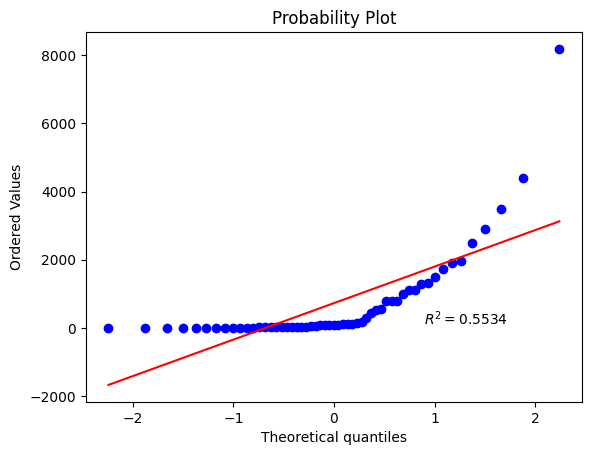

In [14]:
qq=sp.stats.probplot(L, plot=plt, dist='norm', fit=True, rvalue=True)
plt.show()

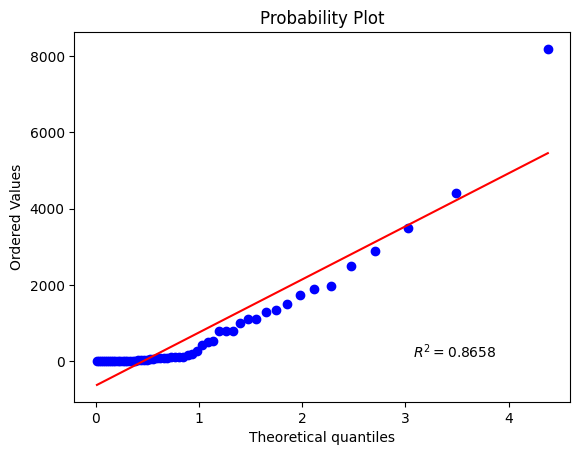

In [15]:
qq=sp.stats.probplot(L, plot=plt, dist=sp.stats.expon , fit=True, rvalue=True)
plt.show()

**3.a]**
Soit $ p \in \mathopen{]}0,1\mathclose{]}$
On pose $F_{\lambda}^{-1}(x) =  \left\{
    \begin{array}{ll}
        1 - \exp(-\lambda x) & \mbox {si } x > 0 \\ 0
         & \mbox{sinon.}
    \end{array}
\right.$

On a $ F_{\lambda}(p) = x \iff 1 - \exp(-\lambda x) = p \iff x = \frac{1}{\lambda}\ln(1-p)$

On reconnait dans la dernière égalité l'expression de  $F_{1}^{-1}(x)$.
On a donc bien l'expression de l'énoncé.



**4]** Le coefficient de corrélation est beaucoup plus élevé pour le modèle exponentiel. C'est donc celui que l'on va choisir.

**Exercice  2**

**1]** On écrit dans un premier temps l'expression de la vraissemblance : 

$
L(x_1,...,x_i,...,x_n;\alpha) = \prod_\limits{i=1}^n \alpha e^{-\alpha x_i} = \alpha^n \prod_\limits{i=1}^n e^{-\alpha x_i} = \alpha^n \exp\left(\sum_\limits{i=1}^n -\alpha x_i\right) = \alpha^n \exp\left(-\alpha\sum_\limits{i=1}^n x_i\right)  
$

La vraisemblance étant positive, on peut prendre le logarithme népérien : 

$ \ln L(x_1,...,x_i,...,x_n;\alpha) = \ln \left[\alpha^n \exp\left(-\alpha\sum_\limits{i=1}^n x_i\right)\right] = n \ln \alpha - \alpha \sum_\limits{i=1}^n x_i $

On prend l'argument qui annule la dérivée première de cette dernière expression : 

$  \frac{\partial \ln L(x_1,...,x_i,...,x_n;\alpha)}{\partial \alpha} = \frac{n}{\alpha} - \sum_\limits{i=1}^n x_i = 0 $

On obtient ainsi : 
${\hat  \alpha }={\frac  {n}{\sum _\limits{{i=1}}^{n}x_{i}}}={\frac  {1}{{\frac  {1}{n}}\sum _\limits{{i=1}}^{n}x_{i}}}$

**2]**

39948.50000000001 55


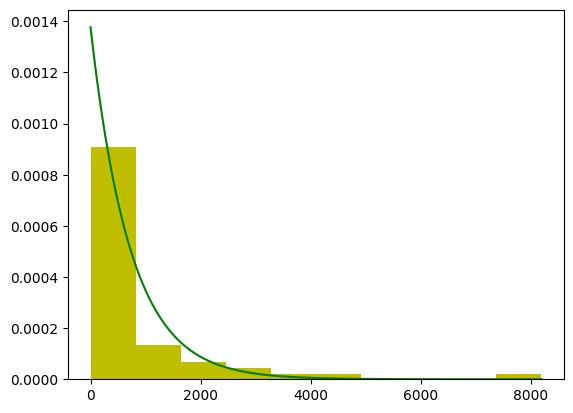

In [110]:
s = sum(L)
n = len(L)
lda = n/s
rv = sp.stats.expon(scale = 1/lda)
x = np.linspace(0,max(L),100000)


plt.plot(x, rv.pdf(x), label="densité de la loi exponentielle", c= 'g')
plt.hist(L, density=True,label="Histogramme de données", color='y')
print(s,n)


**3]** Vérifions que nous avons bien la variance de notre estimateur égale à l'inverse du moment d'ordre 2 de sa fonction score 

$ \def\Var{{\textrm{Var}}\,} \def\I{{\textrm{I}}\,} \def\L{{\textrm{L}}\,}, \def\L{{\textrm{e}}\,}$

$ \Var_{\theta}(\widehat{\theta}) = \Var(\frac{1}{n}\sum\limits_{j=1}^n X_{j}) = \frac{1}{n^2}\Var(\sum\limits_{j=1}^n X_{j}) = \frac{1}{n}\Var(X_{1}) = \frac{1}{n\theta^2} $ par indépendance des $X_{j}$

On calcule l'information de Fisher : $ \I_{\theta} = \Var_{\theta}(\log(\frac{\partial \log p(x,\theta))}{\partial x}))$

On a pour fonction de vraisemblance : $p(x,\theta)= \theta^n \ln\prod\limits_{i=1}^n e^{-\theta x_{i}}$

Ainsi : $\log p(x,\theta) = n\log \theta - \theta\sum\limits_{i=1}^n x_{i} $ 
et donc $\frac{\partial \log p(x,\theta)}{\partial \theta} = \frac{n}{\theta} - \sum\limits_{i=1}^n x_{i}$
et finalement $ \I_{\theta} = \Var(\frac{n}{\theta} - \sum\limits_{i=1}^n x_{i}) = \Var(- \sum\limits_{i=1}^n x_{i}) = \frac{n}{\theta^2}$ par indépendance

Or $g(\theta) = \frac{1}{\theta}$ donc $ (g'(\theta))^2 = \frac{1}{\theta^4}$

On a donc bien $ \Var_{\theta}(\widehat{\theta})= \frac{(g'(\theta))^2}{\I_{\theta}}$.
L'estimateur est donc **efficace**


**4]**

In [25]:
print("Valeur numérique :", sum(L)/n)

Valeur numérique : 726.3363636363638


**5]** $$R(\theta,\widehat g) = b(\theta, \widehat g)^2 + \Var_{\theta}\widehat g(X)$$

Donc pour $g_{\eta}$ on a : 

$$b(\theta, \widehat g_{\eta})^2 = \mathbb{E}_{\theta}[(\widehat g_{\eta}(X) - g(\theta)] = (\frac{\eta - 1}{\theta})^2$$

Et $$\Var_{\theta}(\widehat g_{\eta}(X)) = \eta^2\Var(\widehat g(X)) = \frac{\eta^2}{n\theta^2}$$

D'ou : $$R(\theta,\widehat g_{\eta}) = \frac{1}{\theta^2}[\frac{\eta^2}{n} + (\eta - 1)^2]$$

$ R(\theta,\widehat g) - R(\theta,\widehat g_{\eta}) $ est un polynome de degré 2 en $\eta$ dont on cherche quand les valeurs pour lesquelles ce dernier est stricement négatif (avec rappelons le $R(\theta,\widehat g) =  \Var_{\theta}\widehat g(X) = \frac{1}{n\theta^2}$ )

Après résolution de cette inéquation, on trouve que : 

$$ \forall \eta \in \left]\frac{n-1}{n+1},1\right[ ,  R(\theta,\widehat g) > R(\theta,\widehat g_{\eta}) $$

On gagne en sécurité mais l'estimateur n'est plus biaisé, donc moins précis. On va donc apparaitre ici le compromis entre précision et l'estimateur et faiblesse de son risque. 

**6]** On cherche à estimer le paramètre $a$ vérifiant $\mathbb{P}(X<a) = \frac{1}{2}$

On a donc $ \mathbb{P}(X<a) = \frac{1}{2} \iff 1 - \exp(-\theta a) = \frac{1}{2} \iff a = \frac{\log2}{\theta} $

Ainsi, la valeur d'eta pour laquelle l'estimateur $\widehat g_{\eta}$ est un estimateur de la médiane est $\eta = \log2$



In [32]:
print("Valeur numérique de la médiane :", np.log(2)*sum(L)/n)

Valeur numérique de la médiane : 503.4580025927087


In [33]:
print(np.median(L))

89.9


D'après les calculs précédents : $R(\theta,\widehat g) > R(\theta,\widehat g_{\log2}) \iff \log2 \in \left]\frac{n-1}{n+1},1\right[ \iff n < \frac{1 + \log2}{1 - \log2}$

In [34]:
print("Numériquement on obtient qu'il faut que n soit inférieur à ", (np.log(2) + 1)/(1 - np.log(2)))

Numériquement on obtient qu'il faut que n soit inférieur à  5.517782706541859


On a donc  $\forall n \in \left[1,5\right]$ $ R(\theta,\widehat g) > R(\theta,\widehat g_{\log2})$ 
et $\forall n > 5, R(\theta,\widehat g) < R(\theta,\widehat g_{\log2})$ 


**Exercice 3**

**1]** On a ici à faire à un **one tailed test** avec les hypothèses suivantes : 

$\Theta_{0} = \left\{\theta > \theta_{0} = 0.001\right\}$ 
et $\Theta_{1} = \left\{\theta < \theta_{0} = 0.001\right\}$

**2]** Calculons le rapport de vraisemblance : 

$\def\S{{\textrm{S}}\,}$
$ \forall x = (x_{1},...,x_{n}),  \forall \theta' > \theta, \frac{p_{\theta'}(x)}{p_{\theta}(x)} = {(\frac{\theta'}{\theta})}^n\frac{\prod_\limits{i=1}^n e^{-\theta' x_{i}}}{\prod_\limits{j=1}^n e^{-\theta x_{j}}} = {(\frac{\theta'}{\theta})}^ne^{(\theta - \theta')\S}$ avec $\ \S = \sum_\limits{i = 1}^n x_{i}$

Nous trouvons une fonction croissante de S, nous avons donc : 

$$ \delta(x) = \mathbb{1}_{S(x)>c}$$

$\def\F{{\textrm{F}}\,}$
On cherche $c$ tel que $\alpha = \mathbb{P}_{\theta_{0}}(\S(X) > c ) \iff \mathbb{P}_{\theta_{0}}(\S(X) < c )  = 1 - \alpha$

Or la somme de n variables aléatoire exponentielles de paramètre $\theta_{0}$ suit une loi $\gamma(n,n\theta_{0})$

Donc $ c = \F_{\theta_{0}}^{-1}(1 - \alpha)$ avec $\F$ la fonction quantile de associée à la loi $\gamma(n,n\theta_{0})$


**3]**

In [105]:
alpha = 0.05
n = 55
theta0 = 0.001
c = sp.stats.gamma.ppf(1-alpha,n,scale = 1/(n*theta0))
print(c)
print(sum(L)/n)


1231.6379811669049
726.3363636363638


On a bien le coût moyen qui est inférieur à $c$, on accepte donc l'hypothèse $H_{0}$

In [90]:
p_value = 1 - sp.stats.gamma.cdf(x=sum(L),a=55,scale=1000)
print("p_value : ",p_value)

p_value :  0.986282513576735


**4]**

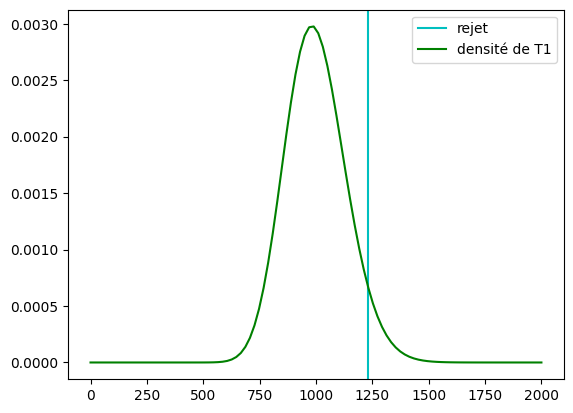

In [81]:
x = np.linspace(0,2000,100)
plt.axvline(x=c, label='rejet', color = 'c') 
densite= sp.stats.gamma.pdf(x, n, scale=1/(n*theta0))
plt.plot(x,densite,color='g', label = 'densité de T1')
plt.legend()

**5]** 

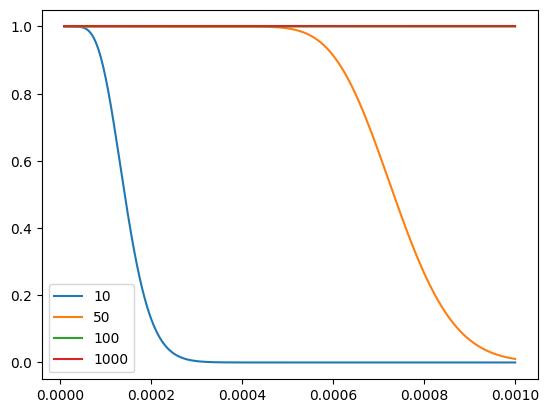

In [104]:
x=np.linspace(1e-5,1e-3,1000)
N = [10,50,100,1000]

k=sp.stats.gamma.ppf(0.95,a=55,scale=1000)

for n in N:
    y=1-sp.stats.gamma.cdf(k,a=n,scale=1/x)
    plt.plot(x,y,label='{}'.format(n))
    
plt.legend( loc='best')


Pour n suffisement grand, les courbes se confondent avec la droite d'équation y = 1 
En effet, pour un échantillon très grand, les valeurs "etrêmes" qui peuvent survenir sont gommées par la masse des valeurs moyennes. Ainsi, la probabilité d'obtenir une valeur qui rejette l'hypothèse devient de plus en plus faible. Par conséquent la puissance du test se rapproche de 1. 


**6]**
$\def\N{{\textrm{N}}\,}$
D'après le théorème centrale limite, on a $T_{1}(X)$ suit une loi $\mathcal{N}(\frac{1}{\theta},\,\frac{1}{n\theta^2})$

On cherche donc $c$ tel que $\mathbb{P}_{\theta = 0.001}(T_{1} > c) = \alpha \iff \mathbb{P}(\frac{T_{1} - \frac{1}{\lambda}}{\frac{1}{\sqrt n\theta}} > q_{1-\alpha}^{\mathcal{N}(0,1)}) = \alpha $

Nous avons donc le test suivant : 

Rejet de $H_{0}$ si : $\frac{T_{1} - \frac{1}{\lambda}}{\frac{1}{\sqrt n\theta}} > q_{1-\alpha}^{\mathcal{N}(0,1)} \approx 1,654$

In [107]:
((10**-3)*sum(L)/np.sqrt(55))-np.sqrt(55)

-2.0295438459730963

L'hypothèse $H_{0}$ n'est donc pas rejetée 